In [1]:
import pandas as pd

# Load the datasets
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')

# Display basic information about the datasets
print(X_train.info())
print(y_train.info())

# Show the first few rows to understand the structure
print(X_train.head())
print(y_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 833 entries, id to x831
dtypes: float64(833)
memory usage: 7.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1212 non-null   float64
 1   y       1212 non-null   float64
dtypes: float64(2)
memory usage: 19.1 KB
None
    id            x0            x1           x2             x3          x4  \
0  0.0  14168.823171  10514.380717  3316.149698   94230.695124  102.386606   
1  1.0  17757.037554           NaN  4101.016273   92959.527633         NaN   
2  2.0  14226.656663  11029.642499          NaN  124055.600561  100.542483   
3  3.0   8766.012436   7384.202998  2147.308418  100157.719990  104.855061   
4  4.0  13801.016418  13269.493652  3408.316953   92048.527786  103.759758   

           x5            x6            x7            x8  ...          x822  \

In [2]:
# Get the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (1212, 833)
y_train shape: (1212, 2)


In [3]:
# Compute summary statistics for features
summary_stats = X_train.describe().T

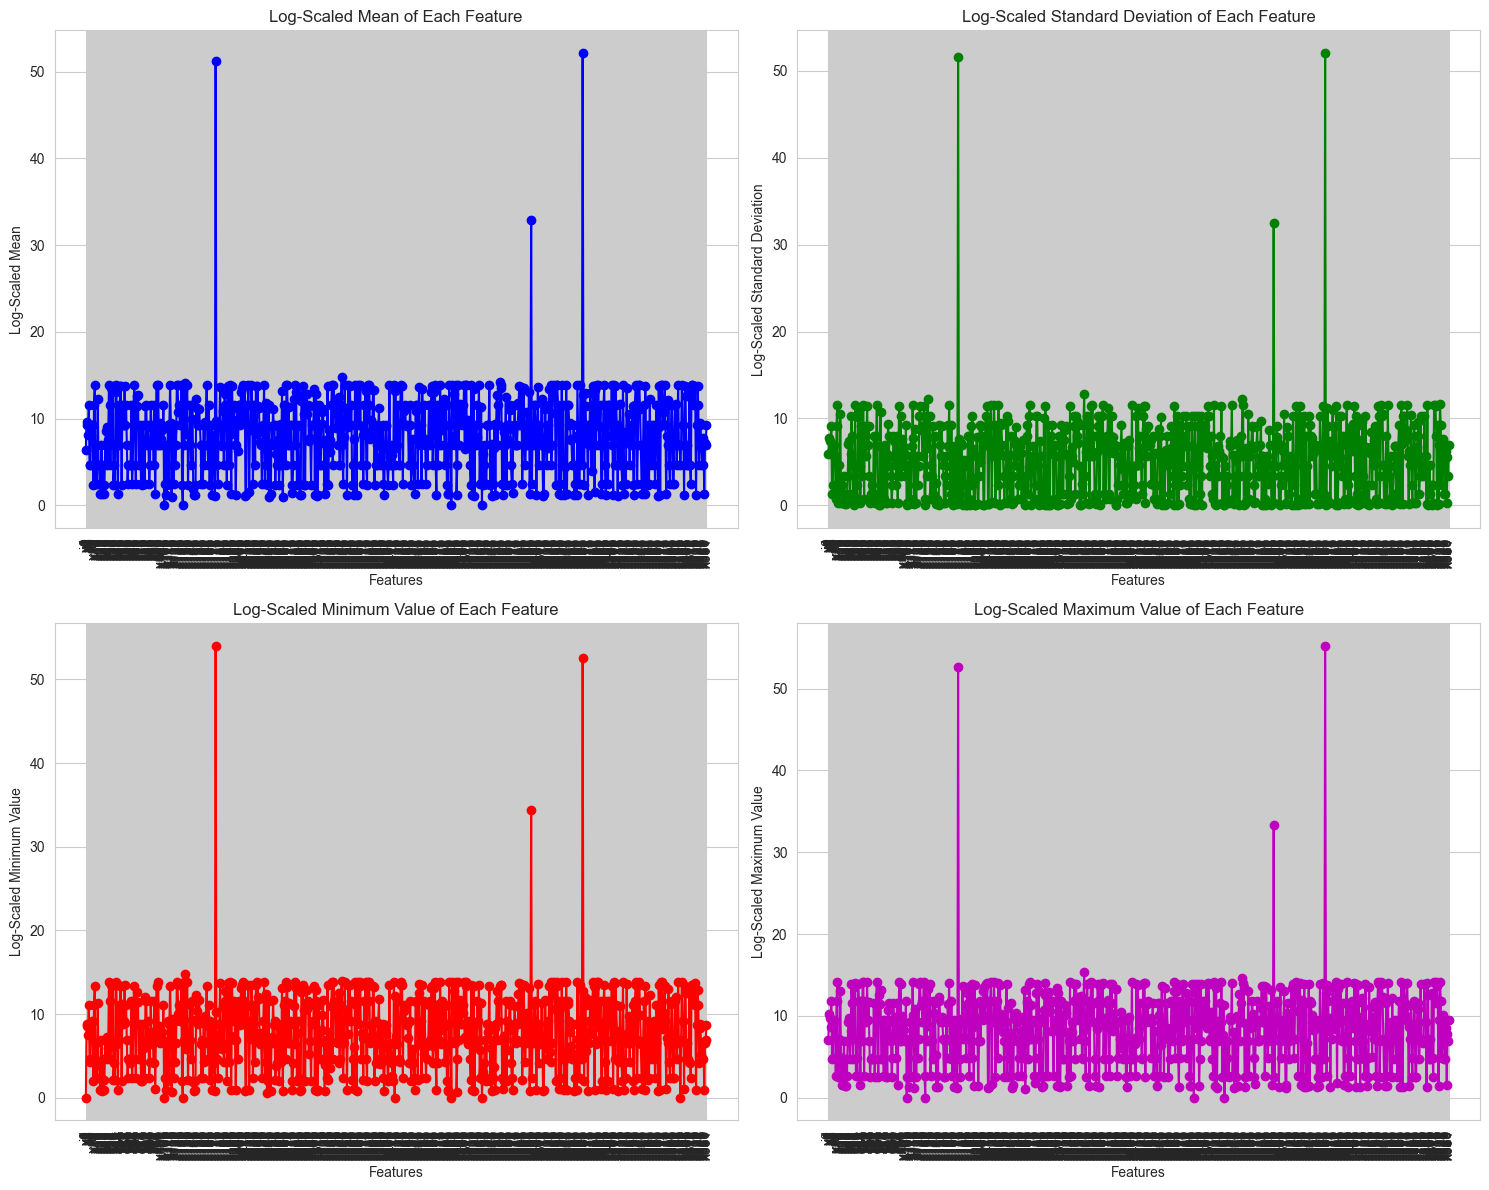

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Apply log scaling to avoid negative values (adding a small constant)
log_scaled_stats = np.log1p(np.abs(summary_stats[['mean', 'std', 'min', 'max']]))

# Plot log-scaled summary statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot log-scaled mean of each feature
axes[0, 0].plot(log_scaled_stats.index, log_scaled_stats['mean'], marker='o', linestyle='-', color='b')
axes[0, 0].set_title('Log-Scaled Mean of Each Feature')
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('Log-Scaled Mean')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot log-scaled standard deviation of each feature
axes[0, 1].plot(log_scaled_stats.index, log_scaled_stats['std'], marker='o', linestyle='-', color='g')
axes[0, 1].set_title('Log-Scaled Standard Deviation of Each Feature')
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Log-Scaled Standard Deviation')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot log-scaled minimum values of each feature
axes[1, 0].plot(log_scaled_stats.index, log_scaled_stats['min'], marker='o', linestyle='-', color='r')
axes[1, 0].set_title('Log-Scaled Minimum Value of Each Feature')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Log-Scaled Minimum Value')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot log-scaled maximum values of each feature
axes[1, 1].plot(log_scaled_stats.index, log_scaled_stats['max'], marker='o', linestyle='-', color='m')
axes[1, 1].set_title('Log-Scaled Maximum Value of Each Feature')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Log-Scaled Maximum Value')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

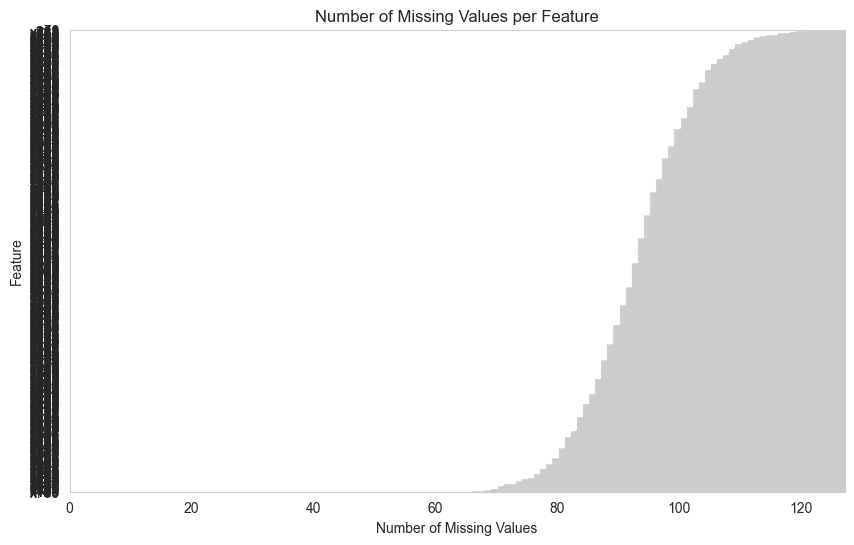

In [5]:
#Step 4: Missing Values Analysis
# Count the number of missing values per feature
missing_values = X_train.isna().sum()

# Plot the number of missing values per feature
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].sort_values().plot(kind='barh')
plt.title('Number of Missing Values per Feature')
plt.xlabel('Number of Missing Values')
plt.ylabel('Feature')
plt.show()


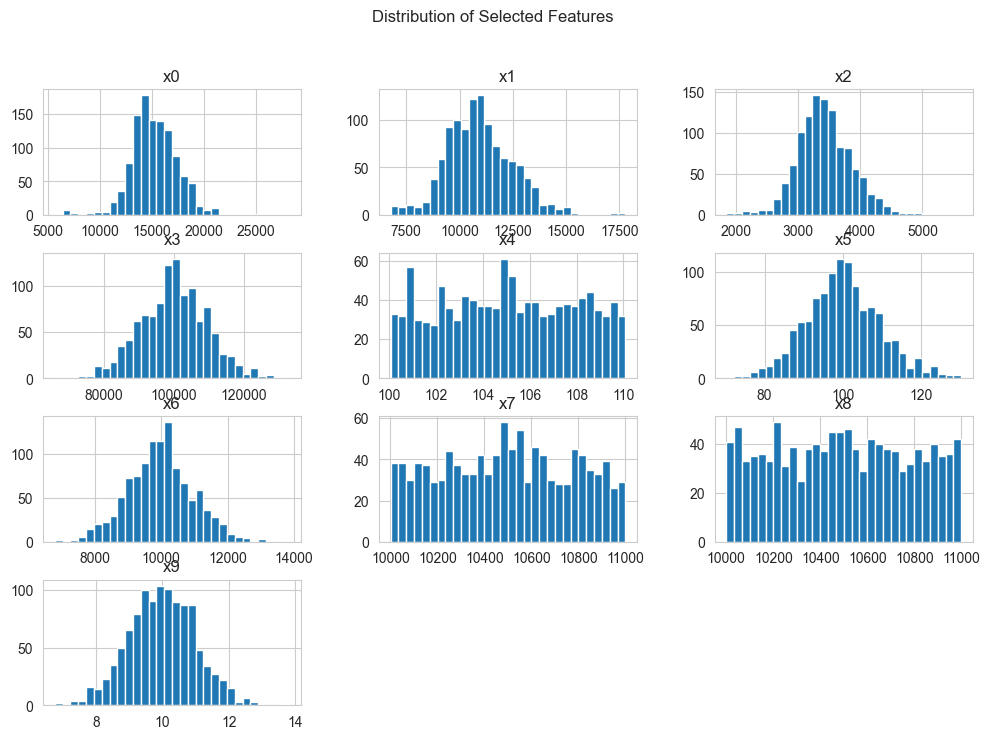

In [6]:
#Step 5 : Feature Distribution Plot
# Plot histograms for a random selection of features
sample_features = X_train.columns[1:11]  # Select a subset of features
X_train[sample_features].hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution of Selected Features')
plt.show()


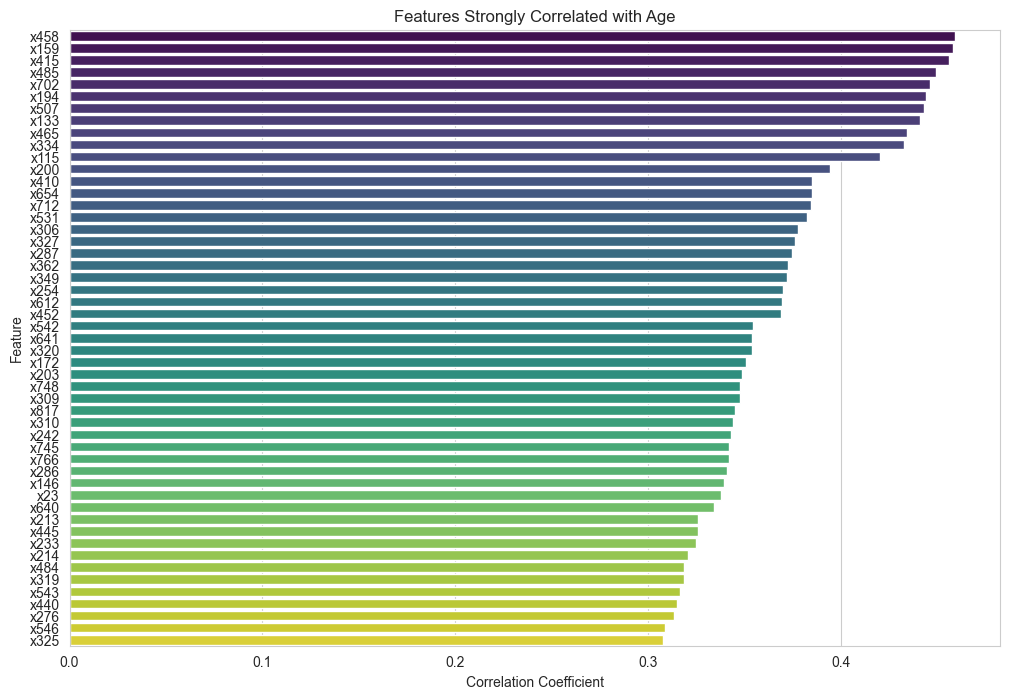

In [7]:
import matplotlib.pyplot as plt

# Step 6: Correlation Analysis
# Remove 'id' and calculate correlation with the target (age)
# Merge the features and target on the 'id' column to create a combined DataFrame

data_with_target = X_train.merge(y_train, on='id')


correlation_with_target = data_with_target.drop(columns=['id']).corr()['y'].drop('y')

# Sort correlations by absolute value
correlation_sorted = correlation_with_target.abs().sort_values(ascending=False)

# Filter features with an absolute correlation above a threshold (e.g., 0.3)
significant_correlations = correlation_sorted[correlation_sorted > 0.3]

# Plot the significant correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=significant_correlations.values, y=significant_correlations.index, hue=significant_correlations.index, palette='viridis', dodge=False, legend=False)
plt.title('Features Strongly Correlated with Age')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()


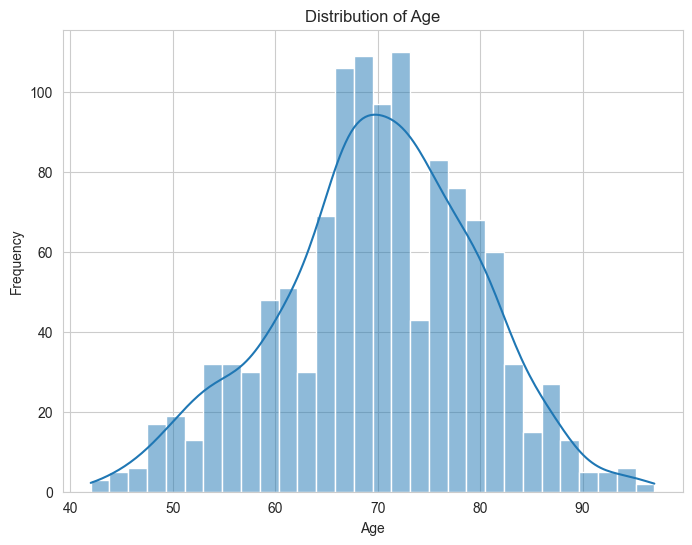

In [8]:
# Step 7: Target Distribution (Age)
# Plot the distribution of the target variable (age)
plt.figure(figsize=(8, 6))
sns.histplot(y_train['y'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# FIRST STEP: Data Imputation
## Median imputation tentative (strong resistance to outliers)

In [9]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the datasets (assuming they're already loaded as X_train and y_train)
# Perform median imputation
median_imputer = SimpleImputer(strategy='median')
X_train_median_imputed = pd.DataFrame(median_imputer.fit_transform(X_train), columns=X_train.columns)

# Check if there are any remaining missing values
print(X_train_median_imputed.isna().sum().sum())  # Should be 0

0


## KNN imputation tentative

In [10]:
from sklearn.impute import KNNImputer

# Perform KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)  # Use 5 neighbors by default
X_train_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)

# Check if there are any remaining missing values
print(X_train_knn_imputed.isna().sum().sum())  # Should be 0


0


## Comparison of imputation methods

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate using cross-validation for median-imputed data
scores_median = cross_val_score(model, X_train_median_imputed.drop(columns=['id']), y_train['y'], cv=5, scoring='r2')
print(f'Cross-validation R² score for median imputation: {scores_median.mean():.4f}')

# Evaluate using cross-validation for KNN-imputed data
scores_knn = cross_val_score(model, X_train_knn_imputed.drop(columns=['id']), y_train['y'], cv=5, scoring='r2')
print(f'Cross-validation R² score for KNN imputation: {scores_knn.mean():.4f}')


Cross-validation R² score for median imputation: 0.4603
Cross-validation R² score for KNN imputation: 0.4442


Cross-validation R² score for median imputation: 0.4603

Cross-validation R² score for KNN imputation: 0.4442


# SECOND STEP: Outlier Detection Techniques

- Z-Score Method: Identifies outliers based on standard deviations from the mean.
- Interquartile Range (IQR) Method: Detects outliers based on the spread of the middle 50% of the data.
- Isolation Forest: An ensemble method specifically designed for anomaly detection.
- Local Outlier Factor (LOF): Measures the local deviation of a data point concerning its neighbors.
- Mahalanobis Distance: Considers the correlation between features to detect outliers in multivariate data.


## 1-Step: Z-Score Method
Identifies outliers based on standard deviations from the mean.


In [12]:
from scipy.stats import zscore


def z_score_outliers(X, threshold=3):
    # Calculate Z-scores for each feature
    z_scores = np.abs(zscore(X, nan_policy='omit'))
    # Identify data points where any feature has a Z-score above the threshold
    outliers = (z_scores > threshold).any(axis=1)
    return outliers

# Apply Z-Score method
z_score_outliers_mask = z_score_outliers(X_train_median_imputed.drop(columns=['id']), threshold=5   )
X_train_z_filtered = X_train_median_imputed[~z_score_outliers_mask]
y_train_z_filtered = y_train[~z_score_outliers_mask]


## 2-Step: IQR Method
The IQR method considers values outside the range [Q1 - 1.5IQR, Q3 + 1.5IQR] as potential outliers.

In [13]:
def iqr_outliers(X, factor=1.5):
    # Calculate Q1 and Q3
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    # Identify outliers
    outliers = ((X < (Q1 - factor * IQR)) | (X > (Q3 + factor * IQR))).any(axis=1)
    return outliers

# Apply IQR method
iqr_outliers_mask = iqr_outliers(X_train_median_imputed.drop(columns=['id']))
X_train_iqr_filtered = X_train_median_imputed[~iqr_outliers_mask]
y_train_iqr_filtered = y_train[~iqr_outliers_mask]

## Step 3: Isolation Forest
Isolation Forest is an unsupervised learning algorithm that identifies anomalies by isolating observations in partitions.

In [14]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.001, random_state=42)  # Adjust contamination as needed
outliers_iso = iso_forest.fit_predict(X_train_median_imputed.drop(columns=['id']))
iso_forest_mask = (outliers_iso != -1)  # -1 indicates outliers

# Filter data
X_train_iso_filtered = X_train_median_imputed[iso_forest_mask]
y_train_iso_filtered = y_train[iso_forest_mask]


## Step 4: Local Outlier Factor (LOF)
LOF is an unsupervised learning algorithm that computes the local density deviation of a data point with respect to its neighbors.

In [15]:
from sklearn.neighbors import LocalOutlierFactor

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)  # Adjust contamination and n_neighbors
outliers_lof = lof.fit_predict(X_train_median_imputed.drop(columns=['id']))
lof_mask = (outliers_lof != -1)  # -1 indicates outliers

# Filter data
X_train_lof_filtered = X_train_median_imputed[lof_mask]
y_train_lof_filtered = y_train[lof_mask]

## Step 5: Mahalanobis Distance
Mahalanobis Distance is a measure of the distance between a point and a distribution.

In [16]:
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

def mahalanobis_outliers(X, threshold=3.0, regularization=1e-6):
    # Calculate the covariance matrix
    cov_matrix = np.cov(X, rowvar=False)
    # Add a regularization term to the diagonal to make it invertible !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    cov_matrix += np.eye(cov_matrix.shape[0]) * regularization
    inv_cov_matrix = inv(cov_matrix)
    # Calculate the mean of each feature
    mean_vector = np.mean(X, axis=0)
    
    # Mahalanobis distance calculation
    distances = [mahalanobis(row, mean_vector, inv_cov_matrix) for row in X]
    distances = np.array(distances)
    # Identify outliers based on the threshold
    outliers = distances > threshold
    return outliers

# Apply Mahalanobis distance with regularization
mahalanobis_outliers_mask = mahalanobis_outliers(X_train_median_imputed.drop(columns=['id']).values, threshold=5.0)
X_train_maha_filtered = X_train_median_imputed[~mahalanobis_outliers_mask]
y_train_maha_filtered = y_train[~mahalanobis_outliers_mask]


## Step 6: Comparing the Outlier Detection Methods

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def evaluate_outlier_method(X_train_filtered, y_train_filtered, method_name, n_splits=5):
    sample_count = len(X_train_filtered)
    # Skip if too few samples
    if sample_count < 5:
        print(f"Skipping {method_name} due to insufficient samples.")
        return None
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    if sample_count < n_splits:
        n_splits = max(2, sample_count)
    
    try:
        scores = cross_val_score(
            model, 
            X_train_filtered.drop(columns=['id']), 
            y_train_filtered['y'], 
            cv=n_splits, 
            scoring='r2'
        )
        return scores.mean()
    except ValueError as e:
        print(f"Error during cross-validation for {method_name}: {e}")
        return None



In [19]:

# Function to check the number of samples remaining
def check_sample_count(X_filtered, y_filtered, method_name):
    sample_count = len(X_filtered)
    print(f"{method_name}: {sample_count} samples remaining.")
    return sample_count


# Check the number of samples remaining for each outlier detection method
check_sample_count(X_train_z_filtered, y_train_z_filtered, "Z-Score")
check_sample_count(X_train_iqr_filtered, y_train_iqr_filtered, "IQR")
check_sample_count(X_train_iso_filtered, y_train_iso_filtered, "Isolation Forest")
check_sample_count(X_train_lof_filtered, y_train_lof_filtered, "LOF")
check_sample_count(X_train_maha_filtered, y_train_maha_filtered, "Mahalanobis")

Z-Score: 1158 samples remaining.
IQR: 2 samples remaining.
Isolation Forest: 1210 samples remaining.
LOF: 1205 samples remaining.
Mahalanobis: 0 samples remaining.


0

The results show that some methods (IQR and Mahalanobis) are too aggressive, leaving too few samples for meaningful evaluation:

Z-Score, Isolation Forest, and LOF: These methods retain a reasonable number of samples (over 1,100), making them suitable for evaluation.
IQR and Mahalanobis: These methods are too strict, leaving very few or no samples. We should either skip them or significantly relax the criteria.
Proposed Next Steps
Proceed with Z-Score, Isolation Forest, and LOF:

Since these methods leave a sufficient number of samples, let's proceed with evaluating them.
Skip IQR and Mahalanobis for Now:

Given the extremely low number of remaining samples, it is not practical to use these methods in their current form. We can revisit them with much looser criteria later if necessary.
Combine Results Using a Voting Approach (Optional):

Consider combining the results of Z-Score, Isolation Forest, and LOF for a final outlier decision. An observation can be marked as an outlier if at least two out of three methods identify it as an outlier. This could yield a more balanced approach.


In [18]:

# Evaluate the three viable methods
results = {
    "Z-Score": evaluate_outlier_method(X_train_z_filtered, y_train_z_filtered, "Z-Score"),
    "Isolation Forest": evaluate_outlier_method(X_train_iso_filtered, y_train_iso_filtered, "Isolation Forest"),
    "LOF": evaluate_outlier_method(X_train_lof_filtered, y_train_lof_filtered, "LOF"),
}

KeyboardInterrupt: 

In [33]:

# Display the results
for method, score in results.items():
    if score is not None:
        print(f"{method} R² score: {score:.4f}")
    else:
        print(f"{method} could not be evaluated.")



Z-Score R² score: 0.4584
Isolation Forest R² score: 0.4468
LOF R² score: 0.4607


- Z-Score R² score: 0.4584
- Isolation Forest R² score: 0.4468
- LOF R² score: 0.4607


In [25]:
X_train_voting_filtered = X_train_lof_filtered
y_train_voting_filtered = y_train_lof_filtered

# THIRD STEP: Feature Selection Methods

### Summary of the Optimal Sequence for Each Method 
| Method | Scaling Needed | PCA Recommended Before | Explanation | 
| --- | --- | --- | --- | 
| L1 (Lasso) | Yes | No | PCA can interfere with Lasso’s ability to select individual sparse features. Use scaling for consistent regularization. | 
| L2 (Ridge) | Yes | Yes (optional) | PCA can help address multicollinearity, which stabilizes Ridge. Scaling is essential for consistent regularization. | 
| L1 + L2 (ElasticNet) | Yes | Yes (optional) | PCA can help with multicollinearity. Scaling ensures balanced regularization on features of varying magnitude. | 
| Random Forest | No | No | Tree-based models don’t require scaling or PCA, as they’re robust to feature correlation and scale. | 

## LASSO Regression (L1 Regularization)


In [40]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a pipeline with scaling and Lasso, adjusting alpha range
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=np.logspace(-1, 1, 50), cv=5, random_state=42, max_iter=10000))  # Higher alphas for stability
])

# Drop the 'id' column
X_train_features_only = X_train_voting_filtered.drop(columns=['id'])

# Fit and select features with non-zero coefficients
lasso_pipeline.fit(X_train_features_only, y_train_voting_filtered['y'])
selected_features_lasso = X_train_features_only.columns[lasso_pipeline.named_steps['lasso'].coef_ != 0]
X_train_lasso = X_train_features_only[selected_features_lasso]

# Evaluate the performance of the Lasso-selected features
lasso_score = cross_val_score(lasso_pipeline, X_train_lasso, y_train_voting_filtered['y'], cv=5, scoring='r2').mean()
print(f"Lasso Feature Selection R² score: {lasso_score:.4f}")


Lasso Feature Selection R² score: 0.4699


## Ridge Regression (L2 Regularization)

In [43]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Pipeline with standardization, PCA, and Ridge regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),  # Adjust the number of components if necessary
    ('ridge', RidgeCV(alphas=[10, 20, 50, 100], cv=5))
])

# Drop 'id' column to create a feature-only dataset
X_train_features_only = X_train_voting_filtered.drop(columns=['id'])

# Evaluate Ridge regression with PCA using cross-validation
ridge_score = cross_val_score(ridge_pipeline, X_train_features_only, y_train_voting_filtered['y'], cv=5, scoring='r2').mean()
print(f"Ridge Regression with PCA R² score: {ridge_score:.4f}")


Ridge Regression with PCA R² score: 0.3701


## Tree-Based Feature Importance (Random Forest)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Drop 'id' column to create a feature-only dataset
X_train_features_only = X_train_voting_filtered.drop(columns=['id'])

# Fit Random Forest and get feature importances
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features_only, y_train_voting_filtered['y'])

# Select features based on importance threshold
importance_threshold = 0.01  # Adjust this threshold as needed
important_features_rf = X_train_features_only.columns[rf_model.feature_importances_ > importance_threshold]
X_train_rf = X_train_features_only[important_features_rf]

# Evaluate Random Forest using the selected features
rf_score = cross_val_score(rf_model, X_train_rf, y_train_voting_filtered['y'], cv=5, scoring='r2').mean()
print(f"Random Forest Feature Selection R² score: {rf_score:.4f}")


Random Forest Feature Selection R² score: 0.4908


## Elastic Net (Combination of L1 and L2 Regularization)


In [47]:
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Pipeline with standardization, PCA, and ElasticNet
elastic_net_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),  # Transform to 50 components
    ('elastic_net', ElasticNetCV(cv=5, random_state=42))
])

# Evaluate ElasticNet with PCA-transformed data directly
enet_score = cross_val_score(elastic_net_pipeline, X_train_features_only, y_train_voting_filtered['y'], cv=5, scoring='r2').mean()
print(f"Elastic Net with PCA R² score: {enet_score:.4f}")


Elastic Net with PCA R² score: 0.3617


## Results of Feature Selection Methods


In [48]:
print(f"Lasso Feature Selection R² score: {lasso_score:.4f}")
print(f"Ridge Regression with PCA R² score: {ridge_score:.4f}")
print(f"Random Forest Feature Selection R² score: {rf_score:.4f}")
print(f"Elastic Net with PCA R² score: {enet_score:.4f}")


Lasso Feature Selection R² score: 0.4699
Ridge Regression with PCA R² score: 0.3701
Random Forest Feature Selection R² score: 0.4908
Elastic Net with PCA R² score: 0.3617


Lasso Feature Selection R² score: 0.4699
Ridge Regression with PCA R² score: 0.3701
Random Forest Feature Selection R² score: 0.4908
Elastic Net with PCA R² score: 0.3617

# FOURTH STEP: Model Selection and Hyperparameter Tuning



In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter grid without "auto" for max_features
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 30),
    'max_features': ['sqrt', 'log2', None],  # Removed "auto"
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_features_only, y_train_voting_filtered['y'])

# Best parameters and score
print("Best parameters found:", random_search.best_params_)
print("Best R² score found:", random_search.best_score_)


KeyboardInterrupt: 

Best parameters found: {'max_depth': 28, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 393}
Best R² score found: 0.4640471806555853

In [ ]:
# Final model training with best parameters
final_rf_model = RandomForestRegressor(
    n_estimators=393,
    max_depth=28,
    max_features=None,
    min_samples_split=8,
    min_samples_leaf=1,
    random_state=42
)

# Fit on the full training data
final_rf_model.fit(X_train_features_only, y_train_voting_filtered['y'])

In [ ]:

# Predict on the test set
y_test_pred = final_rf_model.predict(X_test_selected)

# Format predictions for submission
y_test_pred = np.round(y_test_pred).astype(int)
submission = pd.DataFrame({'id': np.arange(y_test_pred.shape[0]), 'y': y_test_pred.flatten()})
submission.to_csv('/submission_1_original_tests_and_comparison.csv', index=False)
